The data is produced in its original format in fixed-width format text files.  We'll use `pandas` to load some metadata - the station inventory file.

In [1]:
import pandas as pd

stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


The next file we'll open is the station inventory file.  It describes for each site and each variable, the years that each variable is available.

In [2]:
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767053,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767054,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767055,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767056,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


Let's use `pandas` to merge these two tables into one based on the ID.

In [3]:
merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767089,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767090,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767091,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767092,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


Let's filter the merged table just for the `TMAX` element, and those stations still reporting in 2025.  Notice how the number of stations drops - most of the stations in the dataset measure rainfall & many stations have stopped reporting.

In [4]:
#subset for T
merged_stns = merged_stns[(merged_stns['ELEM'] == 'TMAX') & (merged_stns['TiMAX'] == 2025)]
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
18,AE000041196,25.3330,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,25.3330,55.517,TMAX,1944.0,2025.0
22,AEM00041194,25.2550,55.364,10.4,NaN,DUBAI INTL,NaN,41194.0,25.2550,55.364,TMAX,1983.0,2025.0
26,AEM00041217,24.4330,54.651,26.8,NaN,ABU DHABI INTL,NaN,41217.0,24.4330,54.651,TMAX,1983.0,2025.0
30,AEM00041218,24.2620,55.609,264.9,NaN,AL AIN INTL,NaN,41218.0,24.2620,55.609,TMAX,1994.0,2025.0
54,AG000060390,36.7167,3.250,24.0,NaN,ALGER-DAR EL BEIDA,GSN,60390.0,36.7167,3.250,TMAX,1940.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767021,ZA000067743,-17.8170,25.817,986.0,NaN,LIVINGSTONE,GSN,67743.0,-17.8170,25.817,TMAX,1973.0,2025.0
767026,ZAM00067663,-14.4500,28.467,1207.0,NaN,KABWE/MILLIKEN,NaN,67663.0,-14.4500,28.467,TMAX,1973.0,2025.0
767038,ZI000067775,-17.9170,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,67775.0,-17.9170,31.133,TMAX,1956.0,2025.0
767079,ZI000067975,-20.0670,30.867,1095.0,NaN,MASVINGO,NaN,67975.0,-20.0670,30.867,TMAX,1951.0,2025.0


Let's visualize where these currently reporting stations are using a map, depending on when they started taking measurements.  We'll sort them so the oldest ones are last, so they plot on the top of the map.

In [5]:
merged_stns_sorted = merged_stns.sort_values('TiMIN', ascending=False)
merged_stns_sorted

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
624524,USC00364571,41.8422,-79.0169,384.0,PA,KINZUA DAM,NaN,NaN,41.8422,-79.0169,TMAX,2025.0,2025.0
631875,USC00388473,35.0644,-82.6722,384.0,SC,TABLE ROCK RSVR,NaN,NaN,35.0644,-82.6722,TMAX,2025.0,2025.0
488784,USC00126988,41.5919,-85.1017,324.9,IN,PLEASANT LAKE 4NW,NaN,NaN,41.5919,-85.1017,TMAX,2025.0,2025.0
136625,IN009040100,17.9170,77.5330,664.0,NaN,BIDAR,NaN,43125.0,17.9170,77.5330,TMAX,2025.0,2025.0
136632,IN009050100,16.8170,75.7170,594.0,NaN,BIJAPUR,NaN,43161.0,16.8170,75.7170,TMAX,2025.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180323,UK000047811,54.3500,-6.6500,62.0,NaN,ARMAGH,NaN,NaN,54.3500,-6.6500,TMAX,1844.0,2025.0
734417,USW00014734,40.6828,-74.1692,1.8,NJ,NEWARK LIBERTY INTL AP,NaN,72502.0,40.6828,-74.1692,TMAX,1843.0,2025.0
63013,BE000006447,50.8000,4.3500,104.0,NaN,UCCLE,GSN,6447.0,50.8000,4.3500,TMAX,1833.0,2025.0
129320,GM000004204,50.9267,11.5842,155.0,NaN,JENA STERNWARTE,NaN,NaN,50.9267,11.5842,TMAX,1824.0,2025.0


Let's do a query to find stations that are reporting in 2025 and contain the string 'Temecula' the station name field.

In [11]:
merged_stns[merged_stns['NAME'].str.contains('LOS ANGELES', regex=False)]

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
743227,USW00023174,33.9381,-118.3867,29.6,CA,LOS ANGELES INTL AP,NaN,72295.0,33.9381,-118.3867,TMAX,1944.0,2025.0
756781,USW00093134,34.0236,-118.2911,54.6,CA,LOS ANGELES DOWNTOWN/USC,NaN,NaN,34.0236,-118.2911,TMAX,1906.0,2025.0


Let's load the data, then write a function that will download the station you want (called with a GHCN station ID), and calculate the all time record high and low and the normal (mean) high and low temperature for the 1991-2020 period for the desired station and returns a pandas data frame with the columns ['record_min_temp', average_min_temp', 'average_max_temp', record_max_temp'].

In [31]:
df = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/USW00093134.csv",
...      storage_options={"anon": True},
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... )

In [32]:
# Set DATE as index for easier filtering
df = df.set_index('DATE')
    # Filter for temperature observations
df = df[df['ELEMENT'].isin(['TMAX', 'TMIN'])].copy()

    # Convert temperature from tenths of °C to °C
df['VALUE'] = df['DATA_VALUE'] / 10.0

    # Filter for the 1991–2020 period
df = df[(df.index >= '1991-01-01') & (df.index <= '2020-12-31')]

    # Pivot to get TMAX and TMIN in columns
df_pivot = df.pivot_table(index=df.index, columns='ELEMENT', values='VALUE')

    # Calculate stats
record_min_temp = df_pivot['TMIN'].min()
average_min_temp = df_pivot['TMIN'].mean()
average_max_temp = df_pivot['TMAX'].mean()
record_max_temp = df_pivot['TMAX'].max()

    # Return as DataFrame
result = pd.DataFrame({
        'record_min_temp': [record_min_temp],
        'average_min_temp': [average_min_temp],
        'average_max_temp': [average_max_temp],
        'record_max_temp': [record_max_temp]
    })

print(result)

   record_min_temp  average_min_temp  average_max_temp  record_max_temp
0              1.1         14.006087         24.186038             45.0


Develop a plot (using matplotlib) that displays for the city of choice a plot showing the record, average, and actual high and low temperatures for that year and city.

/tmp/ipykernel_8665/1028015422.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


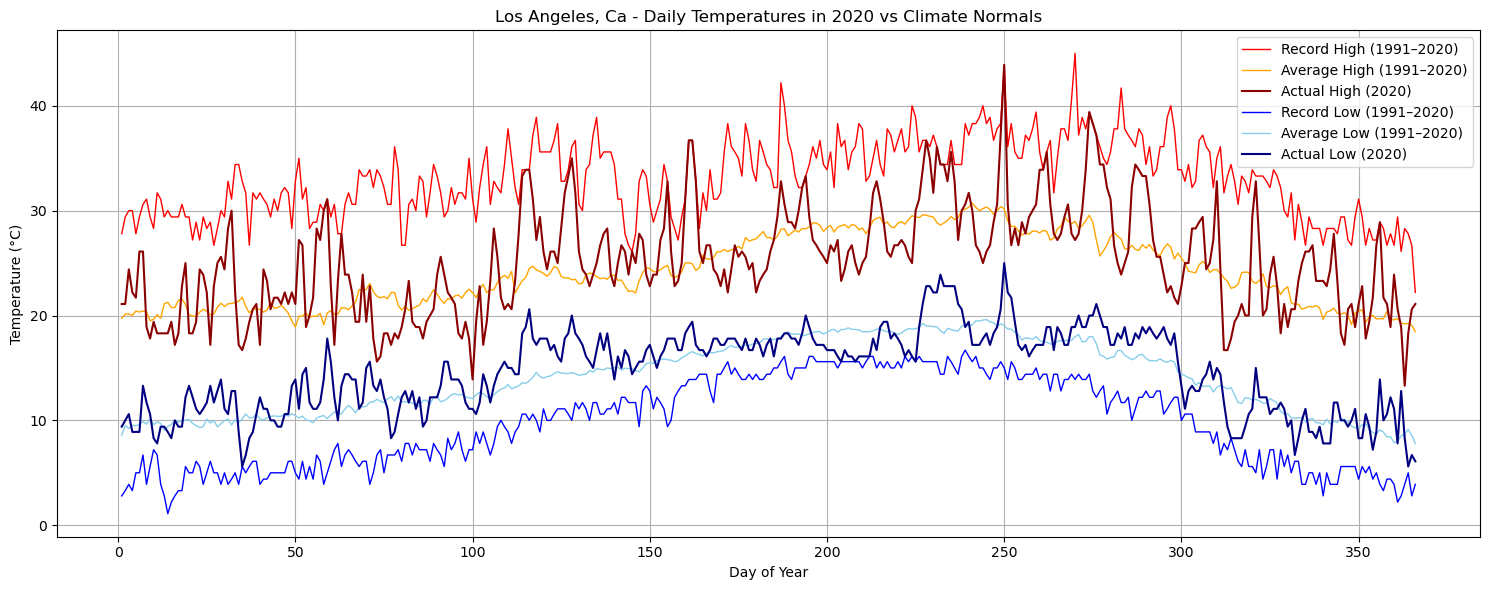

In [38]:
import matplotlib.pyplot as plt

# Load GHCN Daily data
station_id = 'USW00093134'
url = f"s3://noaa-ghcn-pds/csv/by_station/{station_id}.csv"
df = pd.read_csv(
    url,
    storage_options={"anon": True},
    parse_dates=["DATE"]
)

# Filter for TMAX and TMIN
df = df[df['ELEMENT'].isin(['TMAX', 'TMIN'])].copy()
df['VALUE'] = df['DATA_VALUE'] / 10.0  # Convert tenths of °C to °C

# Separate 1991–2020 for record and average
climate_normals = df[(df['DATE'] >= '1991-01-01') & (df['DATE'] <= '2020-12-31')]
pivot_normals = climate_normals.pivot_table(index='DATE', columns='ELEMENT', values='VALUE')
record_max = pivot_normals['TMAX'].groupby(pivot_normals.index.dayofyear).max()
record_min = pivot_normals['TMIN'].groupby(pivot_normals.index.dayofyear).min()
avg_max = pivot_normals['TMAX'].groupby(pivot_normals.index.dayofyear).mean()
avg_min = pivot_normals['TMIN'].groupby(pivot_normals.index.dayofyear).mean()

# Actual temps for 2020
actual_2020 = df[(df['DATE'] >= '2020-01-01') & (df['DATE'] <= '2020-12-31')]
pivot_2020 = actual_2020.pivot_table(index='DATE', columns='ELEMENT', values='VALUE')
actual_max = pivot_2020['TMAX'].groupby(pivot_2020.index.dayofyear).max()
actual_min = pivot_2020['TMIN'].groupby(pivot_2020.index.dayofyear).min()

# Plotting
plt.figure(figsize=(15, 6))
days = range(1, len(record_max) + 1)

plt.plot(days, record_max, color='red', label='Record High (1991–2020)', linewidth=1)
plt.plot(days, avg_max, color='orange', label='Average High (1991–2020)', linewidth=1)
plt.plot(days, actual_max, color='darkred', label='Actual High (2020)', linewidth=1.5)

plt.plot(days, record_min, color='blue', label='Record Low (1991–2020)', linewidth=1)
plt.plot(days, avg_min, color='skyblue', label='Average Low (1991–2020)', linewidth=1)
plt.plot(days, actual_min, color='navy', label='Actual Low (2020)', linewidth=1.5)

plt.title('Los Angeles, Ca - Daily Temperatures in 2020 vs Climate Normals')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
